In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
from tweepy import OAuthHandler
import re
import json
import time
from timeit import default_timer as timer
from functools import reduce
import seaborn as sns

In [2]:
#Importing the cs file into dataframe
df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Displaying the first 5 rows
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Downloading tsv using the Requests library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
#Importing the tsv file into a dataframe
images = pd.read_csv('image-predictions.tsv', sep='\t')


In [6]:
#Displaying the first 5 rows
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Declaring keys and access tokens for Twitter API
consumer_key = ''
consumer_secret ='' 
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [8]:
#Using the tweet IDs in the csv file, query the Twitter API for each tweet's JSON
start = time.time() # start timer

with open('getstatus_error.txt', 'w') as errfile: 
    valid_ids = 0
    err_ids = 0
    tweet_ids = df.tweet_id
    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1), tweet_id))
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json
                
                # Write each tweet's JSON data to its own line in a file
                json.dump(json_content, outfile)
                outfile.write('\n')
                valid_ids += 1
            except tweepy.TweepError as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
        print("%s %s" % ('Valid tweets:', valid_ids))
        print("%s %s" % ('Error tweets:', err_ids))
        
end = time.time() # end timer
print((end - start)/(1000*60))


1# 892420643555336193
2# 892177421306343426
3# 891815181378084864
4# 891689557279858688
5# 891327558926688256
6# 891087950875897856
7# 890971913173991426
8# 890729181411237888
9# 890609185150312448
10# 890240255349198849
11# 890006608113172480
12# 889880896479866881
13# 889665388333682689
14# 889638837579907072
15# 889531135344209921
16# 889278841981685760
17# 888917238123831296
18# 888804989199671297
19# 888554962724278272
20# 888202515573088257
888202515573088257: No status found with that ID.

21# 888078434458587136
22# 887705289381826560
23# 887517139158093824
24# 887473957103951883
25# 887343217045368832
26# 887101392804085760
27# 886983233522544640
28# 886736880519319552
29# 886680336477933568
30# 886366144734445568
31# 886267009285017600
32# 886258384151887873
33# 886054160059072513
34# 885984800019947520
35# 885528943205470208
36# 885518971528720385
37# 885311592912609280
38# 885167619883638784
39# 884925521741709313
40# 884876753390489601
41# 884562892145688576
42# 88444180538

KeyboardInterrupt: 

In [9]:
# List of dictionaries to read tweet's JSON data
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
twitter_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])


In [10]:
#Displaying the first two rows
twitter_df.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8214,37685,"[0, 85]"
1,892177421306343426,6076,32371,"[0, 138]"


In [11]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
tweet_id              1064 non-null int64
retweet_count         1064 non-null int64
favorite_count        1064 non-null int64
display_text_range    1064 non-null object
dtypes: int64(3), object(1)
memory usage: 33.3+ KB


## Assessing data

In [12]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,pupper,None
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
1179,719367763014393856,NaN,NaN,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sid &amp; Murphy. Murphy floats alongside...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,None,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
the               8
Sadie             8
Buddy             7
Bailey            7
Daisy             7
an                7
Toby              7
Oscar             6
Dave              6
Jax               6
Bella             6
Koda              6
Stanley           6
Milo              6
Jack              6
Scout             6
Rusty             6
Leo               6
Sammy             5
               ... 
Jareld            1
Goliath           1
Carter            1
Meatball          1
Tito              1
Zuzu              1
Sparky            1
Spanky            1
Beya              1
Mitch             1
Beemo             1
Mona              1
Ole               1
Keet              1
Brudge            1
Blue              1
Venti             1
Tayzie            1
Vinscent          1


In [18]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055114,True
922,702217446468493312,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,chow,0.226800,True,cocker_spaniel,0.194086,True
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
1275,750056684286914561,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,0.077004,True


In [19]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
images.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
images.shape

(2075, 12)

In [22]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
images['p1'].head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [24]:
images['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            Rottweiler
Name: p2, dtype: object

In [25]:
images['p3'].head()

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               Doberman
Name: p3, dtype: object

In [26]:
sum(images['jpg_url'].duplicated())

66

In [27]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
twitter_df.sample()


,tweet_id,retweet_count,favorite_count,display_text_range
997,747219827526344708,1672,5508,"[0, 75]"


In [29]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
tweet_id              1064 non-null int64
retweet_count         1064 non-null int64
favorite_count        1064 non-null int64
display_text_range    1064 non-null object
dtypes: int64(3), object(1)
memory usage: 33.3+ KB


### Quality issues 

1.df
- tweet_id is an integer
- Delete columns that won't be used for analysis
- timestamp is currently of type 'object'
- source is in HTML format with a and \a(anchor) tags surrounding the text
- Some names are inaccurate such as "a", "an", "the", "very", "by", etc.
- The numerator and denominator columns have unusual values.
- Keep original ratings (no retweets) that have images.
- not all 2356 of the tweets had pictures.

2.images
- tweet_id is an integer
- img_num is an integer
- jpg_url has duplicate values
- standardize values in "p1", "p2" and "p3". Replace underscores for spaces and capitalize all words using title().

3.twitter_df
- tweet_id is an integer


### Tidiness issues

- Merge all the dataframes.
- Combine the dog stages into a single column


# Cleaning data 

In [30]:
#Make copies of the dataframes for cleaning
df_clean = df.copy()
images_clean = images.copy()
twitter_df_clean = twitter_df.copy()

## Quality issue 1 

### Define

Dataframe contains retweets

### Code

In [31]:
#Droping retweet related columns
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ KB


## Quality issue 2

### Define

timestamp has incorrect datatype

### Code

In [33]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

### Test

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.8+ KB


## Quality issue 3

### Define 

tweet_id has incorrect datatype

### Code

In [35]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

### Test 

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 257.8+ KB


## Quality issue 4

### Define

Remove html tags in the source column

### Code 

In [37]:
df_clean.source = df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [38]:
df_clean.source = df_clean.source.astype('category')

### Test 

In [39]:
df_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Quality issue 5

### Define

Remove inaccurate names and replace O with O'Malley

### Code

In [40]:
lowercase_names = []
for row in df_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [41]:
# Replace all names that start with a lowercase letter with a NaN
df_clean['name'].replace(lowercase_names,np.nan,inplace = True)

# Replace all 'None's with a NaN
df_clean['name'].replace('None',np.nan,inplace = True)

# Replace the name 'O' with "O'Malley" 
df_clean['name'].replace('O', "O'Malley",inplace = True)


### Test 

In [42]:
df_clean['name'].value_counts()

Charlie           12
Cooper            11
Oliver            11
Lucy              11
Lola              10
Penny             10
Tucker            10
Winston            9
Bo                 9
Sadie              8
Buddy              7
Toby               7
Daisy              7
Bailey             7
Milo               6
Leo                6
Koda               6
Oscar              6
Stanley            6
Rusty              6
Jack               6
Scout              6
Jax                6
Bella              6
Dave               6
Finn               5
Chester            5
Louis              5
George             5
Larry              5
                  ..
Maks               1
Huxley             1
Petrick            1
Tug                1
Ginger             1
Florence           1
Willie             1
Brandy             1
Deacon             1
Shelby             1
Rolf               1
Josep              1
Sojourner          1
Bloo               1
Fabio              1
Lacy               1
Lambeau      

## Quality issue 6

### Define

Fix rating numerator and denominators that are not actually ratings

### Code

In [43]:
#View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = df_clean[df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


55      @roushfenway These are good dogs but 17/10 is ...
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
561     RT @dog_rates: "Yep... just as I suspected. Yo...
766     "Yep... just as I suspected. You're not flossi...
784     RT @dog_rates: After so many requests, this is...
860     RT @dog_rates: Meet Eve. She's a raging alcoho...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1068    After so many requests, this is Bretagne. She ...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1359    This is Socks. That water pup w the super legs...
1459    This may be the greatest video I've ever been ...
1465    Meet Oliviér. He takes killer selfies. Has a d...
1508    When bae says they can't go out but you see th...
1525    This is Eriq. His friend just reminded him of ...
1538    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1662    This i

In [44]:
for entry in text_ratings_to_fix:
    mask = df_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_clean.loc[mask, column_name2] = 10

In [45]:
df_clean[df_clean.text.isin(text_ratings_to_fix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,13,10,NaN,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,NaN,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58,Twitter for iPhone,"RT @dog_rates: ""Yep... just as I suspected. Yo...",https://twitter.com/dog_rates/status/777684233...,11,10,NaN,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11,10,NaN,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,Twitter for iPhone,"RT @dog_rates: After so many requests, this is...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21,Twitter for iPhone,RT @dog_rates: Meet Eve. She's a raging alcoho...,https://twitter.com/dog_rates/status/673295268...,11,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None


### Define

Fix rating numerator that have decimals.

### Code 

In [46]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,5,10,NaN,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,None,None,None,None


In [47]:

df_clean.loc[(df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_clean.loc[(df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_clean.loc[(df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_clean.loc[(df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [48]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,5,10,NaN,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,None,None,None,None


## Quality issue 7 

### Define 

Remove tweets with no images

### Code 

In [49]:
df_clean= df_clean.dropna(subset=['expanded_urls'])

### Test 

In [50]:
df_clean['expanded_urls'].isnull().value_counts()

False    2297
Name: expanded_urls, dtype: int64

## Quality issue 8

### Define

The column 'jpg_url' has duplicate values

### Code 

In [51]:
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test 

In [52]:
sum(images_clean['jpg_url'].duplicated())

0

## Quality issue 9 

### Define 

tweet-id and img_num has incorrect datatype

### Code 

In [53]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
images_clean['img_num'] = images_clean['img_num'].astype('str')

### Test

In [54]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null object
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), object(6)
memory usage: 162.8+ KB


## Quality issue 10

### Define

 Replace underscores for spaces and capitalize all words using title()

### Code 

In [55]:
images_clean['p1'] = images_clean['p1'].str.replace("_", " ").str.title()
images_clean['p2'] = images_clean['p2'].str.replace("_", " ").str.title()
images_clean['p3'] = images_clean['p3'].str.replace("_", " ").str.title()

### Test 

In [56]:
images_clean['p1'].head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: p1, dtype: object

In [57]:
images_clean['p2'].head()

0                Collie
1    Miniature Pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [58]:
images_clean['p3'].head()

0      Shetland Sheepdog
1    Rhodesian Ridgeback
2             Bloodhound
3     Miniature Pinscher
4               Doberman
Name: p3, dtype: object

## Quality issue 11

### Define

tweet_id has incorrect data type

### Code 

In [60]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')

### Test

In [62]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
tweet_id              1064 non-null object
retweet_count         1064 non-null int64
favorite_count        1064 non-null int64
display_text_range    1064 non-null object
dtypes: int64(2), object(2)
memory usage: 33.3+ KB


## Tidiness issue 1

### Define

Merging the dataframes 

### Code 

In [63]:
twitter = pd.merge(df_clean,images_clean, how = 'left', on = ['tweet_id'])


In [64]:
twitter1 = pd.merge(twitter, twitter_df_clean, 
                      how = 'left', on = ['tweet_id'])

### Test 

In [65]:
twitter1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,Bagel,0.085851,False,Banana,0.076110,False,8214.0,37685.0,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,6076.0,32371.0,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,4017.0,24380.0,"[0, 121]"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8362.0,41010.0,"[0, 79]"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,9075.0,39207.0,"[0, 138]"


In [66]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 28 columns):
tweet_id                 2297 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null datetime64[ns]
source                   2297 non-null category
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null object
rating_denominator       2297 non-null int64
name                     1502 non-null object
doggo                    2297 non-null object
floofer                  2297 non-null object
pupper                   2297 non-null object
puppo                    2297 non-null object
jpg_url                  2009 non-null object
img_num                  2009 non-null object
p1                       2009 non-null object
p1_conf                  2009 non-null float64
p1_dog                   2009 non-null object
p2         

## Tidiness issue 2 

### Define 

Combine dog stages into one column

### Code 

In [67]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter1['dog_stage'] = twitter1['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [68]:
twitter1[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [69]:
# Drop doggo, floofer, pupper, and puppo columns
twitter1 = twitter1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [70]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 25 columns):
tweet_id                 2297 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null datetime64[ns]
source                   2297 non-null category
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null object
rating_denominator       2297 non-null int64
name                     1502 non-null object
jpg_url                  2009 non-null object
img_num                  2009 non-null object
p1                       2009 non-null object
p1_conf                  2009 non-null float64
p1_dog                   2009 non-null object
p2                       2009 non-null object
p2_conf                  2009 non-null float64
p2_dog                   2009 non-null object
p3                       2009 non-null object
p3_conf   

# Saving and Storing the cleaned dataset

In [71]:
#Storing the dataframe into a csv file
twitter1.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

# Analyzing and visualizing data

### INSIGHT 1:Relationship between favorites & retweets

### Visualization

Text(0, 0.5, 'retweet count')

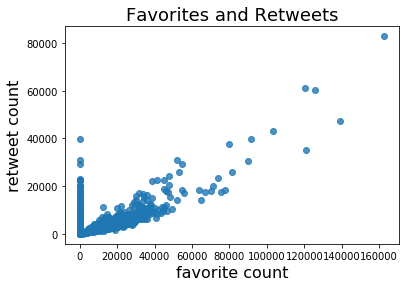

In [72]:
sns.regplot(x = twitter1['favorite_count'], y = twitter1['retweet_count'], fit_reg = False)
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = fig_size
plt.title('Favorites and Retweets', fontsize = 18)
plt.xlabel('favorite count',fontsize=16)
plt.ylabel('retweet count',fontsize=16)


There is a postive correlation between favorite_count and retweet_count.

### INSIGHT 2: Most common breed

In [73]:
twitter1['p1'].value_counts().head(5)


Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Name: p1, dtype: int64

### Visualization 

Text(0.5, 0, 'Dog Breed')

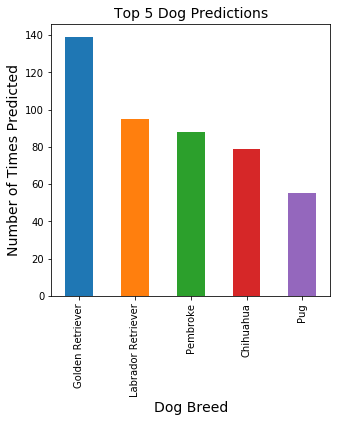

In [74]:
twitter1['p1'].value_counts()[0:5].plot(kind='bar',figsize = (5, 5))
plt.title('Top 5 Dog Predictions',fontsize = 14)
plt.ylabel('Number of Times Predicted',fontsize = 14)
plt.xlabel('Dog Breed',fontsize = 14)

Golden Retriver is the most common breed.

### INSIGHT 3: The major source for tweets

In [75]:
twitter1['source'].value_counts().head(5)

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

### Visualization 

Text(0.5, 1.0, 'sources of tweets')

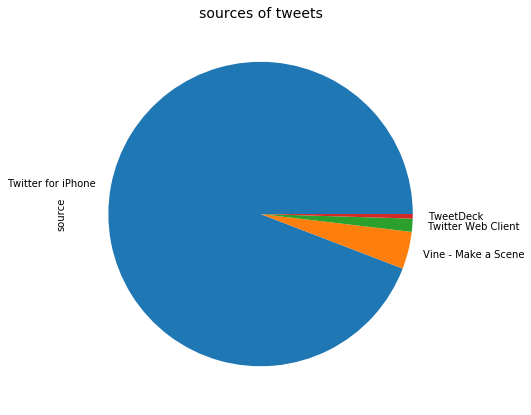

In [76]:
twitter1['source'].value_counts().plot(kind='pie',figsize = (7, 7))
plt.title('sources of tweets',fontsize = 14)

Twitter for iphone is the most common source for tweets

### INSIGHT 4: Most common dog stage

In [77]:
twitter1['dog_stage'].value_counts().head(5)

pupper     263
doggo       90
puppo       34
floofer      4
Name: dog_stage, dtype: int64

### Visualization

Text(0.5, 1.0, 'Dog Stages')

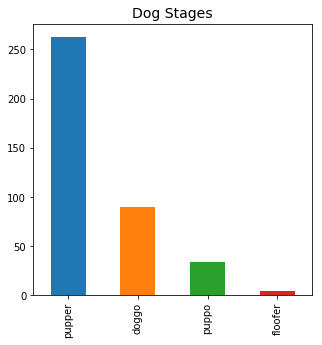

In [78]:
twitter1['dog_stage'].value_counts().plot(kind='bar',figsize = (5, 5))
plt.title('Dog Stages',fontsize = 14)

Pupper is the most common dog stage

### INSIGHT 5: Popular dog names

In [79]:
twitter1['name'].value_counts().head(5)

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Lola       10
Name: name, dtype: int64

### Visualization 

Text(0.5, 1.0, 'most popular dog names')

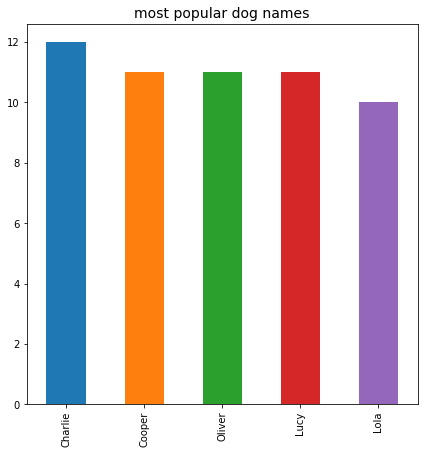

In [80]:
twitter1['name'].value_counts().head(5).plot(kind='bar',figsize = (7, 7))
plt.title('most popular dog names',fontsize = 14)

Charlie is the most popular dog name.
